Import data and libraries.  Print dataframe head to observe layout of table.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Create DataFrame from CSV file
df = pd.read_csv("salaries.csv")
                 
#Print the first 5 rows of the dataframe
print(df.head())

   work_year experience_level employment_type                 job_title  \
0       2025               MI              FT  Customer Success Manager   
1       2025               SE              FT                  Engineer   
2       2025               SE              FT                  Engineer   
3       2025               SE              FT         Applied Scientist   
4       2025               SE              FT         Applied Scientist   

   salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0   57000             EUR          60000                 NL            50   
1  165000             USD         165000                 US             0   
2  109000             USD         109000                 US             0   
3  294000             USD         294000                 US             0   
4  137600             USD         137600                 US             0   

  company_location company_size  
0               NL            L  
1               US

Check df for duplicates, null values, and data types.

In [78]:
# Summary of Data Types & Missing Values
df.info()
print(df.isnull().sum())
print(df.duplicated().sum())
print(df.dtypes)
print(df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88584 entries, 0 to 88583
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           88584 non-null  int64 
 1   experience_level    88584 non-null  object
 2   employment_type     88584 non-null  object
 3   job_title           88584 non-null  object
 4   salary_in_usd       88584 non-null  int64 
 5   employee_residence  88584 non-null  object
 6   remote_ratio        88584 non-null  int64 
 7   company_location    88584 non-null  object
 8   company_size        88584 non-null  object
dtypes: int64(3), object(6)
memory usage: 6.1+ MB
work_year             0
experience_level      0
employment_type       0
job_title             0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64
44355
work_year              int64
experience_level      object
employment_type      

Drop salary, and salary currency since we will use the column salary_in_usd.  Filter data to use only full time employment and residence who reside in the US.

In [6]:
# Drop unnecessary columns
df.drop(columns=['salary', 'salary_currency'], inplace=True)

# Filter for full-time work and US residence
df_us = df[(df['employment_type'] == 'FT') & (df['employee_residence'] == 'US')]

# Optional: Reset index for a cleaner dataframe
df_us.reset_index(drop=True, inplace=True)

# Quick check
print(df_us.shape)
df_us.head()


(79393, 9)


,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,SE,FT,Engineer,165000,US,0,US,M
1,2025,SE,FT,Engineer,109000,US,0,US,M
2,2025,SE,FT,Applied Scientist,294000,US,0,US,M
3,2025,SE,FT,Applied Scientist,137600,US,0,US,M
4,2025,EN,FT,Data Analyst,82000,US,0,US,M


Save filtered data to csv for future use.

In [7]:
# Save the cleaned US-only full-time dataset
df_us.to_csv('us_fulltime_data_jobs.csv', index=False)


Create job categories to group titles.

In [ ]:
# Define updated role-mapping logic
def map_job_family(title):
    title = title.lower()
    if 'bi analyst' in title or 'business intelligence' in title:
        return 'BI Analyst'
    elif 'data analyst' in title:
        return 'Data Analyst'
    elif 'data scientist' in title:
        return 'Data Scientist'
    elif 'machine learning engineer' in title:
        return 'Machine Learning Engineer'
    elif 'data engineer' in title:
        return 'Data Engineer'
    elif 'ai' in title or 'artificial intelligence' in title or 'ml' in title:
        return 'AI'
    else:
        return 'Other'  # Ensures every row gets a category

# Make a safe copy of the filtered DataFrame
df_us = df[df['employee_residence'] == 'US'].copy()

# Apply the mapping to create a new column without triggering a warning
df_us['job_family'] = df_us['job_title'].apply(map_job_family)


C:\Users\dorna\AppData\Local\Temp\ipykernel_16092\279583452.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_us['job_family'] = df_us['job_title'].apply(map_job_family)


In [ ]:
Visualize the counts per job family.

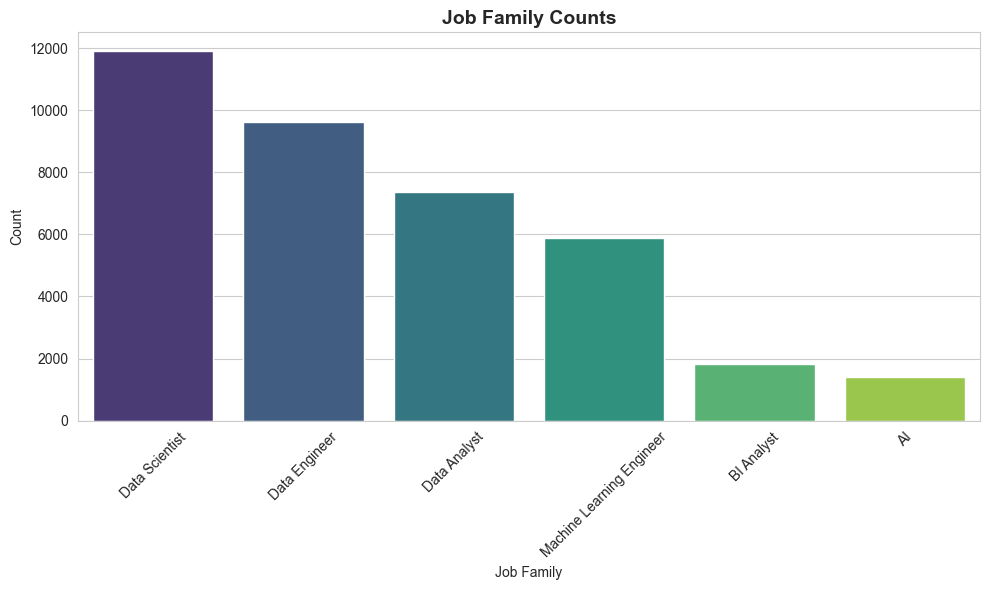

In [ ]:
# Prepare data for plotting
job_family_counts = df_us['job_family'].value_counts().reset_index()
job_family_counts.columns = ['job_family', 'count']

# Plotting
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.barplot(
    data=job_family_counts,
    x='job_family',
    y='count',
    hue='job_family',
    palette='viridis',
    legend=False
)
plt.title('Job Family Counts')
plt.xlabel('Job Family')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Visualize median salary by job category and year.

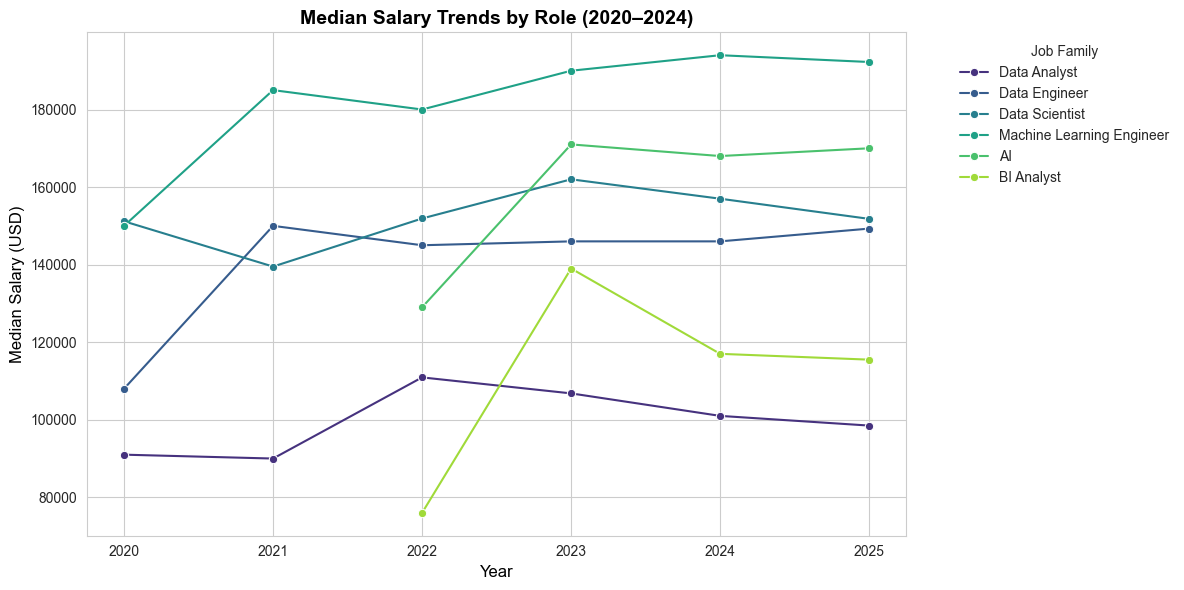

In [ ]:
sns.set_style('whitegrid')

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=median_salary_trend,
    x='work_year',
    y='salary_in_usd',
    hue='job_family',
    palette='viridis',
    marker='o'
)

plt.title('Median Salary Trends by Role (2020–2024)', fontsize=14, color='black')
plt.xlabel('Year', fontsize=12, color='black')
plt.ylabel('Median Salary (USD)', fontsize=12, color='black')

plt.grid(True)

# Customize legend background and border
legend = plt.legend(title='Job Family', bbox_to_anchor=(1.05, 1), loc='upper left')
legend.get_frame().set_facecolor('white')
legend.get_frame().set_edgecolor('none')  # Or use a light gray like '#e0e0e0' if you want a border

plt.tight_layout()
plt.show()


Create wordcloud to observe job titles.

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


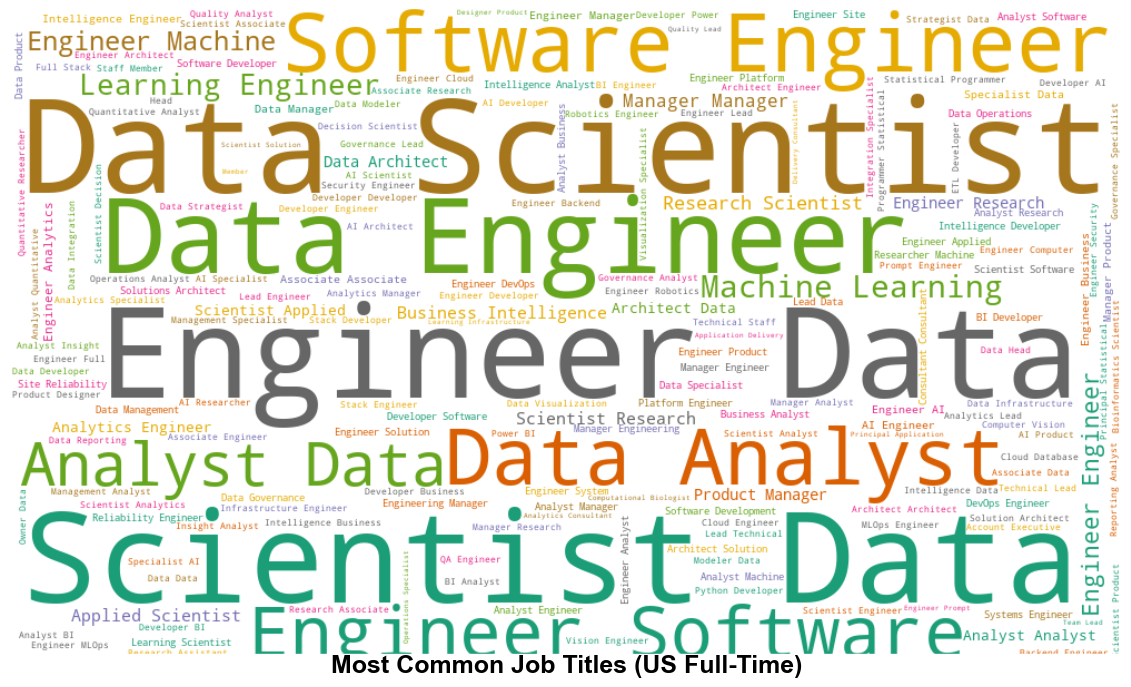

In [86]:
%pip install wordcloud
from wordcloud import WordCloud
from matplotlib.patches import Rectangle

# Combine job titles into a single string
all_titles = " ".join(df['job_title'].dropna().tolist())

# Generate word cloud
wordcloud = WordCloud(
    width=1000,
    height=600,
    background_color='white',
    colormap='Dark2',
    max_words=200,
    contour_width=2,
    contour_color='#D4AF37',  # gold
    prefer_horizontal=0.9
).generate(all_titles)

# Plot
fig, ax = plt.subplots(figsize=(12, 7))
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis('off')

# Add white rectangle behind title (adjust y-position and size if needed)
ax.add_patch(Rectangle(
    (0, 580),        # (x, y) starting from bottom-left
    1000,            # width
    40,              # height
    color='white',
    zorder=2,
    transform=ax.transData
))

# Add title text in black on top of white patch
ax.text(
    500, 590,  # (x, y) center of the rectangle
    "Most Common Job Titles (US Full-Time)",
    fontsize=18,
    fontweight='bold',
    color='black',
    ha='center',
    va='center',
    zorder=3,
    transform=ax.transData
)

plt.tight_layout()
plt.show()


Visualize top 10 highest paid job titles.

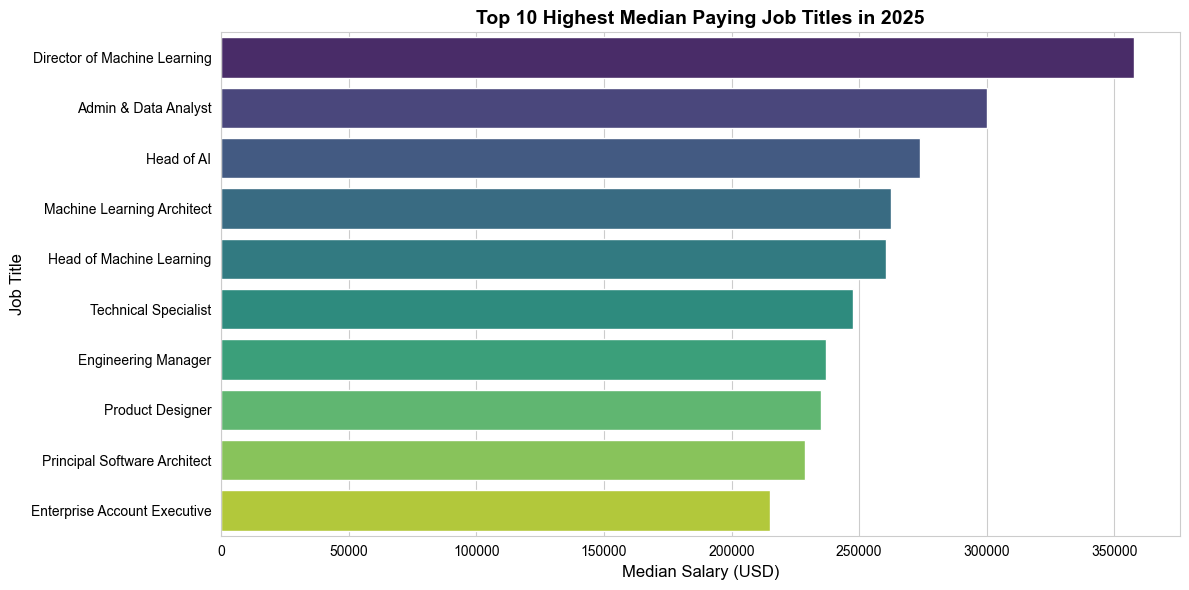

In [ ]:
# Step 1: Filter for the most recent year
latest_year = df['work_year'].max()
df_latest = df[df['work_year'] == latest_year]

# Step 2–3: Group by job_title and compute median salary
top_jobs = (
    df_latest
    .groupby('job_title')['salary_in_usd']
    .median()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

# Set white background and black axes/titles
sns.set_style("whitegrid")

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_jobs,
    x='salary_in_usd',
    y='job_title',
    hue='job_title',
    palette='viridis',
    legend=False
)

# Styling
plt.title(f'Top 10 Highest Median Paying Job Titles in {latest_year}', fontsize=14, color='black')
plt.xlabel('Median Salary (USD)', fontsize=12, color='black')
plt.ylabel('Job Title', fontsize=12, color='black')
plt.xticks(color='black')
plt.yticks(color='black')
plt.tight_layout()
plt.show()



Visualize salary distrubution using boxplots by job category.

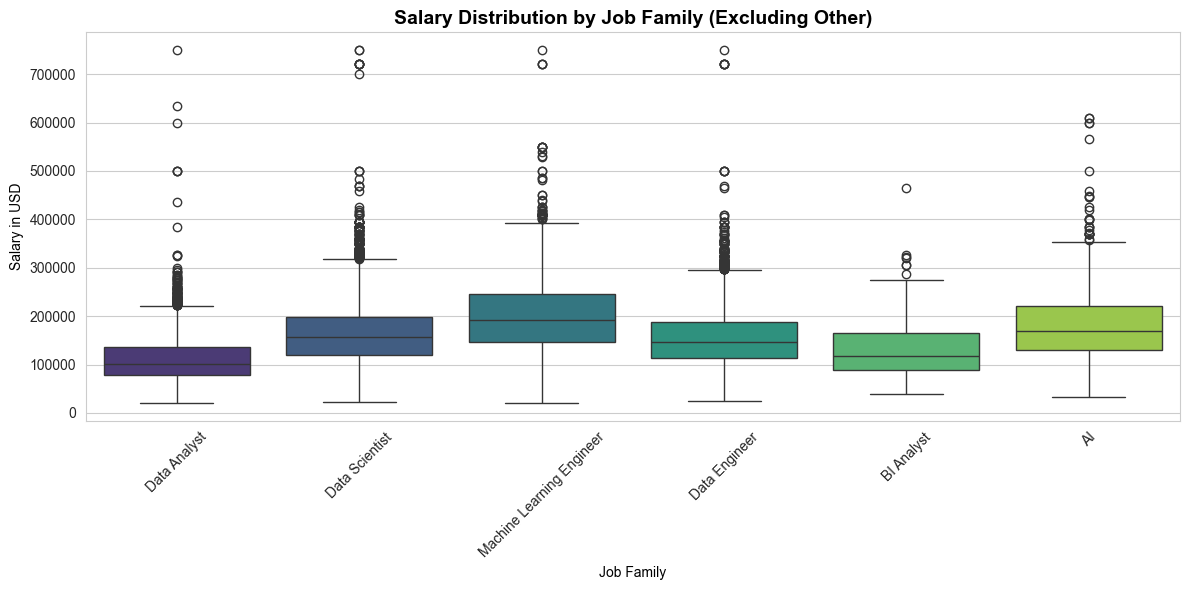

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df_us.query("job_family != 'Other'"),
    x='job_family',
    y='salary_in_usd',
    hue='job_family',           
    palette='viridis',
    legend=False               
)

plt.title('Salary Distribution by Job Family (Excluding Other)', color='black')
plt.xlabel('Job Family', color='black')
plt.ylabel('Salary in USD', color='black')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Replace experience abbreviations with experience name.

In [120]:
# Map experience codes to labels
exp_map = {
    'EN': 'Entry',
    'MI': 'Mid',
    'SE': 'Senior',
    'EX': 'Executive'
}

# Apply mapping using .loc to avoid SettingWithCopyWarning
df_us.loc[:, 'experience_level_label'] = df_us['experience_level'].map(exp_map)

# Set as ordered categorical using .loc again
exp_order = ['Entry', 'Mid', 'Senior', 'Executive']
df_us.loc[:, 'experience_level_label'] = pd.Categorical(
    df_us['experience_level_label'],
    categories=exp_order,
    ordered=True
)


Visualize boxplot of salary distribution for job category by experience level.

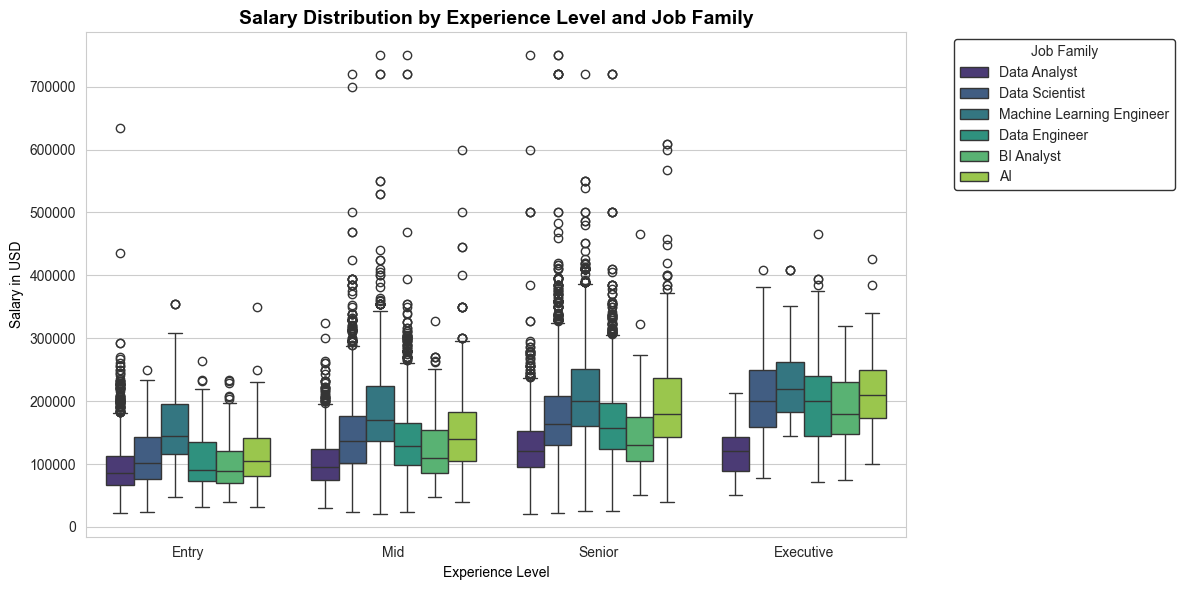

In [91]:
plt.figure(figsize=(12, 6))

sns.boxplot(
    data=df_us.query("job_family != 'Other'"),
    x='experience_level_label',
    y='salary_in_usd',
    hue='job_family',
    palette='viridis'
)

plt.title('Salary Distribution by Experience Level and Job Family', color='black')
plt.xlabel('Experience Level', color='black')
plt.ylabel('Salary in USD', color='black')

# Legend styling
legend = plt.legend(title='Job Family', bbox_to_anchor=(1.05, 1), loc='upper left')
legend.get_frame().set_facecolor('white')
legend.get_frame().set_edgecolor('black')

plt.tight_layout()
plt.show()


Visualize salary distribution by company size.

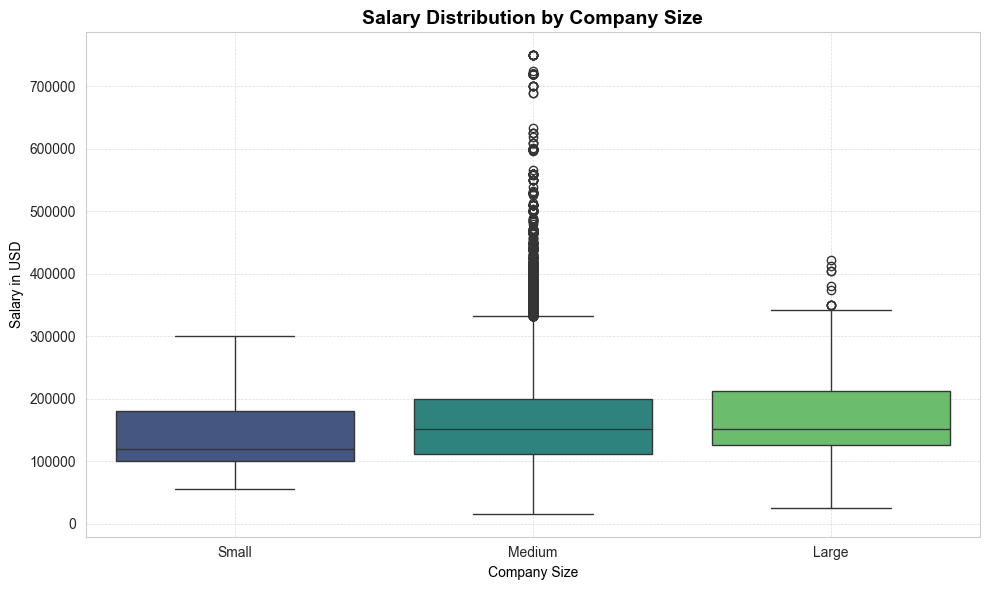

In [ ]:
# 1. Relabel company sizes
size_mapping = {'S': 'Small', 'M': 'Medium', 'L': 'Large'}
df_us.loc[:, 'company_size_label'] = df_us['company_size'].map(size_mapping)

# 2. Set ordered categories
size_order = ['Small', 'Medium', 'Large']
df_us.loc[:, 'company_size_label'] = pd.Categorical(df_us['company_size_label'], categories=size_order, ordered=True)

# 3. Plot
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df_us,
    x='company_size_label',
    y='salary_in_usd',
    hue='company_size_label', 
    palette='viridis',
    legend=False
)

plt.title('Salary Distribution by Company Size', color='black')
plt.xlabel('Company Size', color='black')
plt.ylabel('Salary in USD', color='black')
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()



Replace abbreviations for remote ratio with appropriate labels.

In [122]:
df_us.loc[:, 'remote_ratio_label'] = df_us['remote_ratio'].replace({
    0: 'Onsite',
    50: 'Hybrid',
    100: 'Remote'
})


Visualize salary distribution by ratio of remote work.

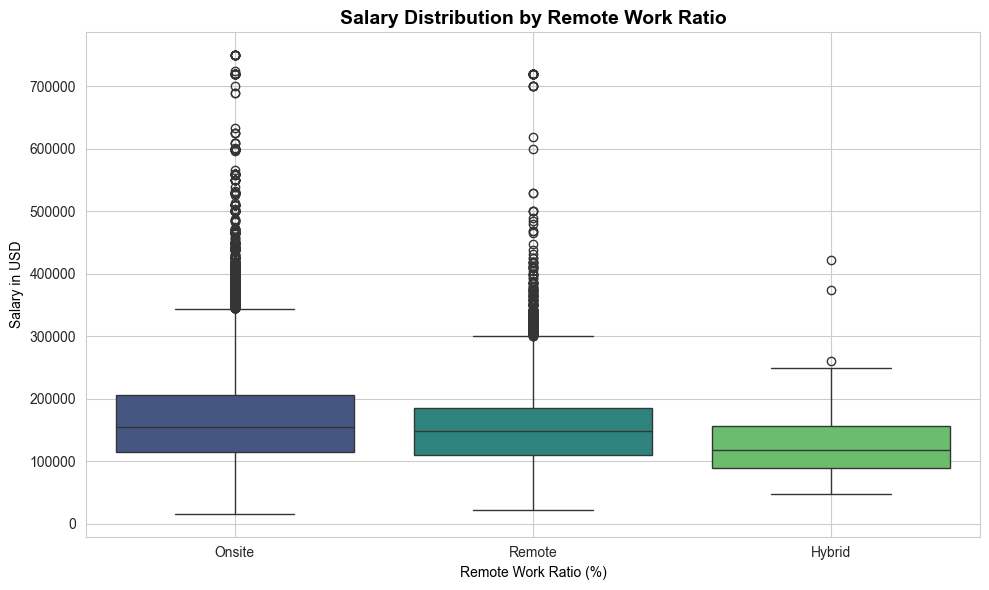

In [123]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df_us,
    x='remote_ratio_label',
    y='salary_in_usd',
    hue='remote_ratio_label',  
    palette='viridis',
    legend=False              
)

plt.title('Salary Distribution by Remote Work Ratio', color='black')
plt.xlabel('Remote Work Ratio (%)', color='black')
plt.ylabel('Salary in USD', color='black')
plt.grid(True)
plt.tight_layout()
plt.show()


Visualzie change in onsite, hybrid, and remote only jobs over the years.

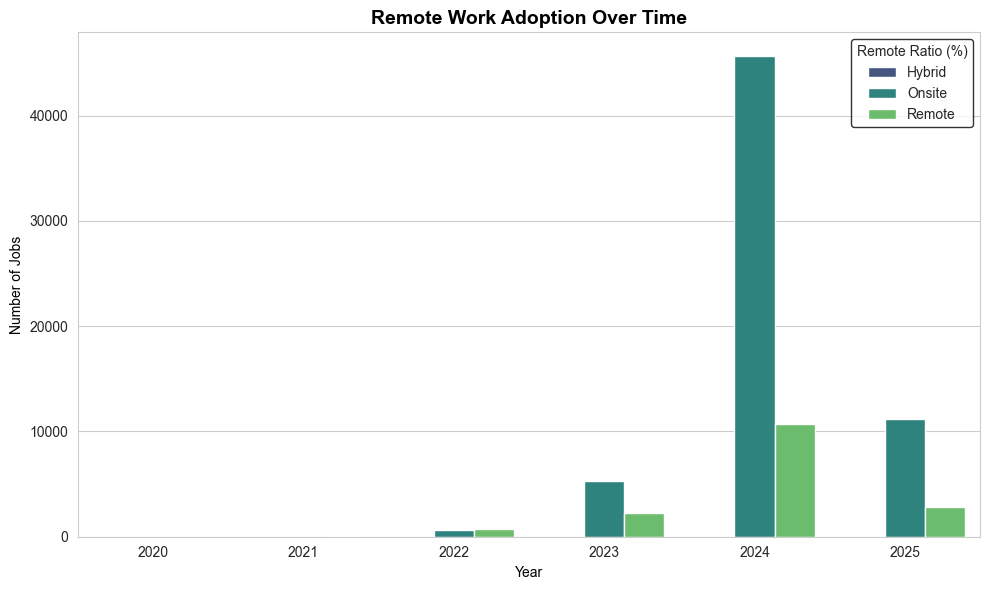

In [104]:
# Create remote_trend DataFrame and add remote_ratio_label
remote_trend = (
    df_us
    .groupby(['work_year', 'remote_ratio_label'])
    .size()
    .reset_index(name='count')
)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=remote_trend,
    x='work_year',
    y='count',
    hue='remote_ratio_label',
    palette='viridis'
)

plt.title('Remote Work Adoption Over Time', color='black')
plt.xlabel('Year', color='black')
plt.ylabel('Number of Jobs', color='black')

# Customize the legend
legend = plt.legend(title='Remote Ratio (%)', title_fontsize=10, frameon=True, edgecolor='black')
legend.get_frame().set_facecolor('white')  # white background
legend.get_frame().set_edgecolor('black')  # black border

plt.tight_layout()
plt.show()



Visualize number of jobs by job category and remote ratio.

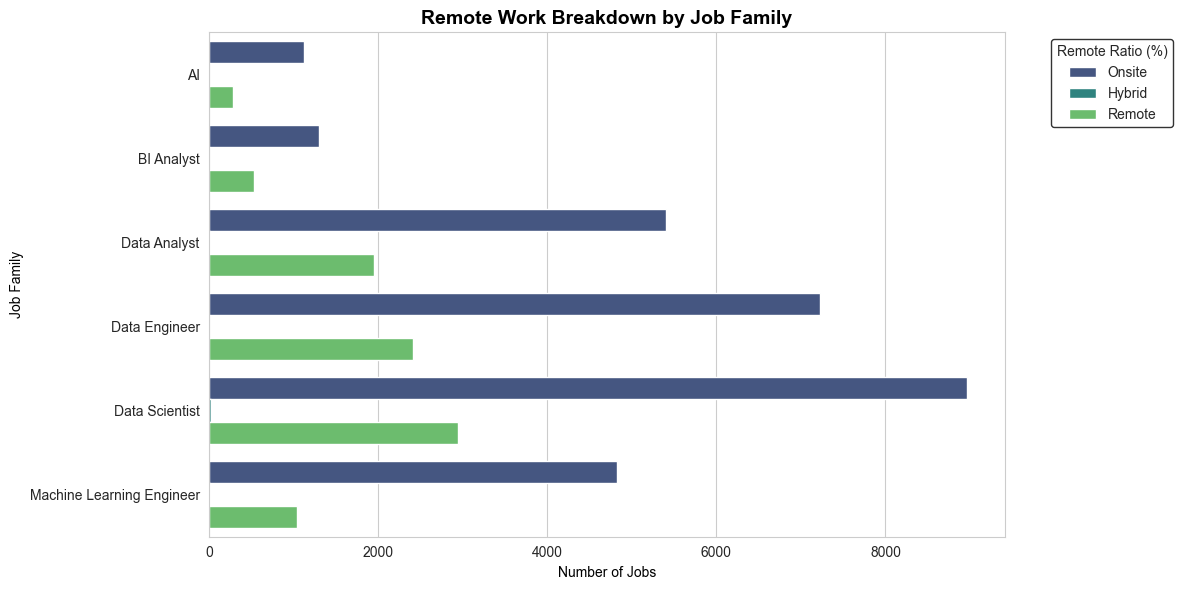

In [107]:
# Add remote_ratio_label to remote_by_role for plotting
remote_by_role['remote_ratio_label'] = remote_by_role['remote_ratio'].replace({
    0: 'Onsite',
    50: 'Hybrid',
    100: 'Remote'
})

plt.figure(figsize=(12, 6))
sns.barplot(
    data=remote_by_role,
    x='count',
    y='job_family',
    hue='remote_ratio_label',
    palette='viridis'
)

plt.title('Remote Work Breakdown by Job Family', color='black')
plt.xlabel('Number of Jobs', color='black')
plt.ylabel('Job Family', color='black')

# Fix legend appearance
legend = plt.legend(
    title='Remote Ratio (%)',
    title_fontsize=10,
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    frameon=True
)
legend.get_frame().set_facecolor('white')
legend.get_frame().set_edgecolor('black')

plt.tight_layout()
plt.show()


